<a href="https://colab.research.google.com/github/Mayank0195/Capstone_Project_ML_Regression_Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing drive on the colab notebook for the easy access of the data provided 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the pathway for the Rossmann Stores Data.csv
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Regression/results.csv')
df1

,Date,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
0,2013-01-01,85,2,0,1.0,1,b,a,1870.0,0,...,1,1,2013185,6613.290323,2013185,930.000000,15.0,0.000000,0,8.347590
1,2013-01-01,259,2,0,1.0,1,b,b,210.0,0,...,1,1,20131259,6079.354839,20131259,1420.387097,0.0,0.000000,0,8.832150
2,2013-01-01,259,2,0,1.0,1,b,b,210.0,0,...,1,1,20131259,6079.354839,20131259,511.774194,0.0,0.000000,0,8.832150
3,2013-01-01,259,2,0,1.0,1,b,b,210.0,0,...,1,1,20131259,5427.290323,20131259,1420.387097,0.0,0.000000,0,8.832150
4,2013-01-01,259,2,0,1.0,1,b,b,210.0,0,...,1,1,20131259,5427.290323,20131259,511.774194,0.0,0.000000,0,8.832150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786156,2015-07-31,1111,5,1,0.0,1,a,a,1900.0,1,...,31,212,201571111,3927.806452,201571111,325.258065,13.0,24.000000,1,8.652248
786157,2015-07-31,1112,5,1,0.0,1,c,c,1880.0,0,...,31,212,201571112,7312.000000,201571112,580.193548,111.0,0.000000,0,9.172223
786158,2015-07-31,1113,5,1,0.0,1,a,c,9260.0,0,...,31,212,201571113,5842.290323,201571113,584.580645,22.0,0.000000,0,8.894122
786159,2015-07-31,1114,5,1,0.0,1,a,c,870.0,0,...,31,212,201571114,20212.516129,201571114,3001.548387,22.0,0.000000,0,10.222232


In [4]:
df2 = df1.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786161 entries, 0 to 786160
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 786161 non-null  object 
 1   Store                786161 non-null  int64  
 2   DayOfWeek            786161 non-null  int64  
 3   Promo                786161 non-null  int64  
 4   StateHoliday         786161 non-null  float64
 5   SchoolHoliday        786161 non-null  int64  
 6   StoreType            786161 non-null  object 
 7   Assortment           786161 non-null  object 
 8   CompetitionDistance  786161 non-null  float64
 9   Promo2               786161 non-null  int64  
 10  Year                 786161 non-null  int64  
 11  Month                786161 non-null  int64  
 12  WeekOfYear           786161 non-null  int64  
 13  DayOfYear            786161 non-null  int64  
 14  sales_key            786161 non-null  int64  
 15  AvgSales         

In [6]:
df2 = df2.drop(['Date'], axis = 1)

In [7]:
df2

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,...,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
0,85,2,0,1.0,1,b,a,1870.0,0,2013,...,1,1,2013185,6613.290323,2013185,930.000000,15.0,0.000000,0,8.347590
1,259,2,0,1.0,1,b,b,210.0,0,2013,...,1,1,20131259,6079.354839,20131259,1420.387097,0.0,0.000000,0,8.832150
2,259,2,0,1.0,1,b,b,210.0,0,2013,...,1,1,20131259,6079.354839,20131259,511.774194,0.0,0.000000,0,8.832150
3,259,2,0,1.0,1,b,b,210.0,0,2013,...,1,1,20131259,5427.290323,20131259,1420.387097,0.0,0.000000,0,8.832150
4,259,2,0,1.0,1,b,b,210.0,0,2013,...,1,1,20131259,5427.290323,20131259,511.774194,0.0,0.000000,0,8.832150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786156,1111,5,1,0.0,1,a,a,1900.0,1,2015,...,31,212,201571111,3927.806452,201571111,325.258065,13.0,24.000000,1,8.652248
786157,1112,5,1,0.0,1,c,c,1880.0,0,2015,...,31,212,201571112,7312.000000,201571112,580.193548,111.0,0.000000,0,9.172223
786158,1113,5,1,0.0,1,a,c,9260.0,0,2015,...,31,212,201571113,5842.290323,201571113,584.580645,22.0,0.000000,0,8.894122
786159,1114,5,1,0.0,1,a,c,870.0,0,2015,...,31,212,201571114,20212.516129,201571114,3001.548387,22.0,0.000000,0,10.222232


## **6. Store Sales Prediction**

In [8]:
dfd = df2.sample(n=50000, random_state=1)

In [9]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [10]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [11]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [12]:
# split training and test datasets
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

In [13]:
xd_train

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,...,CompetitionOpen,Promo2Open,Promo2running,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
668845,827,3,0,0.0,0,250.0,0,2015,3,13,...,122.0,0.000000,0,1,0,0,0,0,0,1
277875,814,3,1,0.0,0,24530.0,0,2013,10,41,...,3.0,0.000000,0,0,0,0,1,0,0,1
507665,916,4,1,0.0,0,90.0,0,2014,10,40,...,23.0,0.000000,0,1,0,0,0,1,0,0
345053,17,1,0,0.0,0,50.0,1,2013,12,50,...,96.0,41.523288,0,1,0,0,0,1,0,0
466642,102,5,1,0.0,0,150.0,1,2014,6,23,...,78.0,2.991781,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692638,1034,2,0,0.0,0,13750.0,0,2015,4,17,...,0.0,0.000000,0,1,0,0,0,1,0,0
230008,1073,1,0,0.0,1,1710.0,1,2013,8,34,...,0.0,9.698630,0,1,0,0,0,0,0,1
775291,294,2,0,0.0,0,3150.0,0,2015,7,30,...,122.0,0.000000,0,1,0,0,0,1,0,0
490078,1051,3,1,0.0,0,200.0,1,2014,7,27,...,192.0,29.983562,1,0,0,1,0,1,0,0


In [14]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## **6.1 Linear Regression (OLS)**

In [15]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [16]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

a = linreg.score(xd_train, yd_train)
b = linreg.score(xd_test, yd_test)
c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)
print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)

Regresion Model Score : 0.68661847074049 , Out of Sample Test Score : 0.6754822690381482
Training RMSE : 0.2390756938203306 Testing RMSE : 0.24098847795604322
Training MAPE : 1.9806698006638896 Testing MAPE : 1.9961559284277748
R2_train : 0.686618 , R2_test : 0.675482
Adj_r2_train : 0.686394 , Adj_r2_test : 0.67494


In [17]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['LinearRegression', a, b, c, d, e, f, g, h, i, j]
df_1= dict(zip(comparison_columns,metric_scores))

In [18]:
df_1

{'Adj_r2_test': 0.67494,
 'Adj_r2_train': 0.686394,
 'Model_Name': 'LinearRegression',
 'R2_test': 0.675482,
 'R2_train': 0.686618,
 'Regresion Model Score': 0.68661847074049,
 'Sample Test Score': 0.6754822690381482,
 'Testing MAPE': 1.9961559284277748,
 'Testing RMSE': 0.24098847795604322,
 'Training MAPE': 1.9806698006638896,
 'Training RMSE': 0.2390756938203306}

## **6.2 Bayesian Ridge Regression**

In [19]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [20]:
# validation
print("Regresion Model Score" , ":" , rdgreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(xd_test, yd_test))

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted = rdgreg.predict(xd_test)

a = rdgreg.score(xd_train, yd_train)
b = rdgreg.score(xd_test, yd_test)
c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)
print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)

Regresion Model Score : 0.6866142977912446 , Out of Sample Test Score : 0.6755050216642854
Regresion Model Score : 0.6866142977912446 , Out of Sample Test Score : 0.6755050216642854
Training RMSE : 0.23907728556604918 Testing RMSE : 0.2409800297014013
Training MAPE : 1.9805368177069158 Testing MAPE : 1.99601095825692
R2_train : 0.686614 , R2_test : 0.675505
Adj_r2_train : 0.68639 , Adj_r2_test : 0.674963


In [21]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['BayesianRidge', a, b, c, d, e, f, g, h, i, j]
df2= dict(zip(comparison_columns,metric_scores))

In [22]:
df2

{'Adj_r2_test': 0.674963,
 'Adj_r2_train': 0.68639,
 'Model_Name': 'BayesianRidge',
 'R2_test': 0.675505,
 'R2_train': 0.686614,
 'Regresion Model Score': 0.6866142977912446,
 'Sample Test Score': 0.6755050216642854,
 'Testing MAPE': 1.99601095825692,
 'Testing RMSE': 0.2409800297014013,
 'Training MAPE': 1.9805368177069158,
 'Training RMSE': 0.23907728556604918}

In [23]:
df_1 = pd.DataFrame([df_1])

In [24]:
df_1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.686618,0.675482,0.239076,0.240988,1.98067,1.996156,0.686618,0.675482,0.686394,0.67494


In [25]:
df2 = pd.DataFrame([df2])

In [26]:
comparison_df1 = df_1.merge(df2, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.686618,0.675482,0.239076,0.240988,1.980670,1.996156,0.686618,0.675482,0.686394,0.674940
1,BayesianRidge,0.686614,0.675505,0.239077,0.240980,1.980537,1.996011,0.686614,0.675505,0.686390,0.674963


## **6.3 LARS Lasso Regression**

In [27]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)

In [28]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

a = lasreg.score(xd_train, yd_train)
b = lasreg.score(xd_test, yd_test)
c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)
print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)


Regresion Model Score : 0.5061755432177396 , Out of Sample Test Score : 0.49639186575671534
Regresion Model Score : 0.5061755432177396 , Out of Sample Test Score : 0.49639186575671534
Training RMSE : 0.30011314941210243 Testing RMSE : 0.3002088089556772
Training MAPE : 2.6191154877436578 Testing MAPE : 2.616874462365595
R2_train : 0.506176 , R2_test : 0.496392
Adj_r2_train : 0.505823 , Adj_r2_test : 0.495551


In [29]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['LassoLars', a, b, c, d, e, f, g, h, i, j]
df3= dict(zip(comparison_columns,metric_scores))

In [30]:
df3 = pd.DataFrame([df3])

In [31]:
comparison_df1 = comparison_df1.merge(df3, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.686618,0.675482,0.239076,0.240988,1.980670,1.996156,0.686618,0.675482,0.686394,0.674940
1,BayesianRidge,0.686614,0.675505,0.239077,0.240980,1.980537,1.996011,0.686614,0.675505,0.686390,0.674963
2,LassoLars,0.506176,0.496392,0.300113,0.300209,2.619115,2.616874,0.506176,0.496392,0.505823,0.495551


## **6.4 Decision Tree Regression**

In [32]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xl_train, yl_train)

In [33]:
a = treereg.score(xl_train, yl_train)
b = treereg.score(xl_test, yl_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)


c = rmse(yl_train, yl_predicted)
d = rmse(yl_test, yl_test_predicted)
e = mape(yl_train, yl_predicted)
f = mape(yl_test, yl_test_predicted)
g = round(r2_score(yl_train, yl_predicted),6)
h = round(r2_score(yl_test, yl_test_predicted),6)
i = round(1 - (1-r2_score(yl_train, yl_predicted)) * (len(yl_train)-1)/(len(yl_train)-xl_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yl_test, yl_test_predicted)) * (len(yl_test)-1)/(len(yl_test)-xl_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)


Regresion Model Score : 0.8337661071065741 , Out of Sample Test Score : 0.7578539232043265
Training RMSE : 0.17412395167550052 Testing RMSE : 0.2081688686580896
Training MAPE : 1.4072647278645425 Testing MAPE : 1.6827448123971074
R2_train : 0.833766 , R2_test : 0.757854
Adj_r2_train : 0.833671 , Adj_r2_test : 0.757531


In [34]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['DecisionTreeRegressor', a, b , c, d, e, f, g, h, i, j]
df4 = dict(zip(comparison_columns,metric_scores))

In [35]:
df4 = pd.DataFrame([df4])

In [36]:
comparison_df1 = comparison_df1.merge(df4, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.686618,0.675482,0.239076,0.240988,1.980670,1.996156,0.686618,0.675482,0.686394,0.674940
1,BayesianRidge,0.686614,0.675505,0.239077,0.240980,1.980537,1.996011,0.686614,0.675505,0.686390,0.674963
2,LassoLars,0.506176,0.496392,0.300113,0.300209,2.619115,2.616874,0.506176,0.496392,0.505823,0.495551
3,DecisionTreeRegressor,0.833766,0.757854,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531


## **6.5 Random Forest Regression**

In [37]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [38]:
a = rdfreg.score(xl_train, yl_train)
b = rdfreg.score(xl_test, yl_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)


c = rmse(yl_train, yl_predicted)
d = rmse(yl_test, yl_test_predicted)
e = mape(yl_train, yl_predicted)
f = mape(yl_test, yl_test_predicted)
g = round(r2_score(yl_train, yl_predicted),6)
h = round(r2_score(yl_test, yl_test_predicted),6)
i = round(1 - (1-r2_score(yl_train, yl_predicted)) * (len(yl_train)-1)/(len(yl_train)-xl_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yl_test, yl_test_predicted)) * (len(yl_test)-1)/(len(yl_test)-xl_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)




Regresion Model Score : 0.9750611245860988 , Out of Sample Test Score : 0.8353154753671406
Training RMSE : 0.17412395167550052 Testing RMSE : 0.2081688686580896
Training MAPE : 1.4072647278645425 Testing MAPE : 1.6827448123971074
R2_train : 0.833766 , R2_test : 0.757854
Adj_r2_train : 0.833671 , Adj_r2_test : 0.757531


In [39]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['RandomForestRegressor', a, b, c, d, e, f, g, h, i, j]
df5= dict(zip(comparison_columns,metric_scores))

In [40]:
df5 = pd.DataFrame([df5])

In [41]:
comparison_df1 = comparison_df1.merge(df5, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.686618,0.675482,0.239076,0.240988,1.980670,1.996156,0.686618,0.675482,0.686394,0.674940
1,BayesianRidge,0.686614,0.675505,0.239077,0.240980,1.980537,1.996011,0.686614,0.675505,0.686390,0.674963
2,LassoLars,0.506176,0.496392,0.300113,0.300209,2.619115,2.616874,0.506176,0.496392,0.505823,0.495551
3,DecisionTreeRegressor,0.833766,0.757854,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531
4,RandomForestRegressor,0.975061,0.835315,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531


## **6.6 K-Nearest Neighbors Regression**

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
knnreg = knn.fit(xd_train, yd_train)

In [43]:
a = knnreg.score(xd_train, yd_train)
b =  knnreg.score(xd_test, yd_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" ,b)

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)


Regresion Model Score : 0.6087009023929184 , Out of Sample Test Score : 0.5066248426577917
Training RMSE : 0.26714875232980057 Testing RMSE : 0.29714313588770025
Training MAPE : 2.3624344907546653 Testing MAPE : 2.61256387643419
R2_train : 0.608701 , R2_test : 0.506625
Adj_r2_train : 0.608421 , Adj_r2_test : 0.505801


In [44]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['KNeighborsRegressor', a, b, c, d, e, f, g, h, i, j]
df6 = dict(zip(comparison_columns,metric_scores))

In [45]:
for x in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

Regresion Model Score : 0.983989334567472 , Out of Sample Test Score : 0.192586561619148
Regresion Model Score : 0.8033307628343763 , Out of Sample Test Score : 0.38378115037886007
Regresion Model Score : 0.7298220941938328 , Out of Sample Test Score : 0.44192699115039324
Regresion Model Score : 0.6910627162571117 , Out of Sample Test Score : 0.4704084766220483
Regresion Model Score : 0.6657080068533412 , Out of Sample Test Score : 0.48256455750059213
Regresion Model Score : 0.648525718168188 , Out of Sample Test Score : 0.4921059389038468
Regresion Model Score : 0.6361780110697236 , Out of Sample Test Score : 0.4972430627600454
Regresion Model Score : 0.625020546304032 , Out of Sample Test Score : 0.5012234820530552
Regresion Model Score : 0.6159089156140349 , Out of Sample Test Score : 0.504337067541352


In [46]:
df6 = pd.DataFrame([df6])

In [47]:
comparison_df1 = comparison_df1.merge(df6, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.686618,0.675482,0.239076,0.240988,1.980670,1.996156,0.686618,0.675482,0.686394,0.674940
1,BayesianRidge,0.686614,0.675505,0.239077,0.240980,1.980537,1.996011,0.686614,0.675505,0.686390,0.674963
2,LassoLars,0.506176,0.496392,0.300113,0.300209,2.619115,2.616874,0.506176,0.496392,0.505823,0.495551
3,DecisionTreeRegressor,0.833766,0.757854,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531
4,RandomForestRegressor,0.975061,0.835315,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531
5,KNeighborsRegressor,0.608701,0.506625,0.267149,0.297143,2.362434,2.612564,0.608701,0.506625,0.608421,0.505801


## **6.7 Random Forest Regression Tuned**

In [48]:
# Create model
rf_tuned = RandomForestRegressor()

In [49]:
#import
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(xd_train,yd_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  31.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  32.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  24.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  36.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  35.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [73]:
#best para
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 130}

In [74]:
#save the best parameters
random_t = rf_random.best_estimator_

In [51]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=130, max_depth = 90, bootstrap=False, max_features='sqrt', min_samples_leaf=1, min_samples_split= 8)
rdfreg = rdf.fit(xl_train, yl_train)

In [52]:
a = rdfreg.score(xl_train, yl_train)
b = rdfreg.score(xl_test, yl_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)


c = rmse(yl_train, yl_predicted)
d = rmse(yl_test, yl_test_predicted)
e = mape(yl_train, yl_predicted)
f = mape(yl_test, yl_test_predicted)
g = round(r2_score(yl_train, yl_predicted),6)
h = round(r2_score(yl_test, yl_test_predicted),6)
i = round(1 - (1-r2_score(yl_train, yl_predicted)) * (len(yl_train)-1)/(len(yl_train)-xl_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yl_test, yl_test_predicted)) * (len(yl_test)-1)/(len(yl_test)-xl_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)

Regresion Model Score : 0.9790465985793706 , Out of Sample Test Score : 0.8558839916382464
Training RMSE : 0.17412395167550052 Testing RMSE : 0.2081688686580896
Training MAPE : 1.4072647278645425 Testing MAPE : 1.6827448123971074
R2_train : 0.833766 , R2_test : 0.757854
Adj_r2_train : 0.833671 , Adj_r2_test : 0.757531


In [53]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regresion Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['RandomForestRegressorTuned', a, b, c, d, e, f, g, h, i, j]
df5= dict(zip(comparison_columns,metric_scores))

In [54]:
df5 = pd.DataFrame([df5])

In [55]:
df5

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,RandomForestRegressorTuned,0.979047,0.855884,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531


In [56]:
comparison_df1 = comparison_df1.merge(df5, how='outer')
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.686618,0.675482,0.239076,0.240988,1.980670,1.996156,0.686618,0.675482,0.686394,0.674940
1,BayesianRidge,0.686614,0.675505,0.239077,0.240980,1.980537,1.996011,0.686614,0.675505,0.686390,0.674963
2,LassoLars,0.506176,0.496392,0.300113,0.300209,2.619115,2.616874,0.506176,0.496392,0.505823,0.495551
3,DecisionTreeRegressor,0.833766,0.757854,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531
4,RandomForestRegressor,0.975061,0.835315,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531
5,KNeighborsRegressor,0.608701,0.506625,0.267149,0.297143,2.362434,2.612564,0.608701,0.506625,0.608421,0.505801
6,RandomForestRegressorTuned,0.979047,0.855884,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531


Text(0.5, 0, 'Relative Importance')

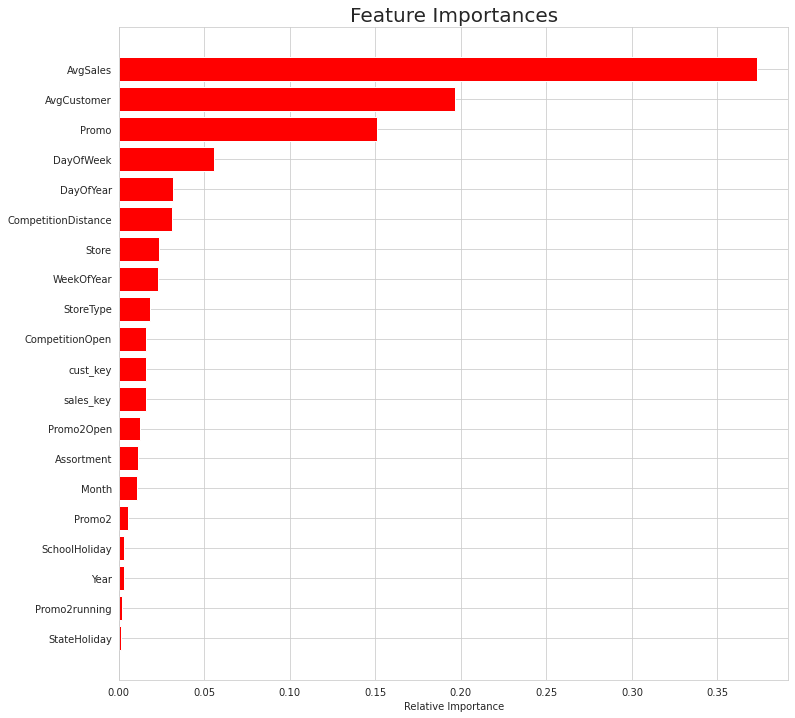

In [57]:
features = xl_test.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## **7. Model Performance and Evaluation**

In [63]:
#Taking a look of our final comparison dataframe
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.686618,0.675482,0.239076,0.240988,1.980670,1.996156,0.686618,0.675482,0.686394,0.674940
1,BayesianRidge,0.686614,0.675505,0.239077,0.240980,1.980537,1.996011,0.686614,0.675505,0.686390,0.674963
2,LassoLars,0.506176,0.496392,0.300113,0.300209,2.619115,2.616874,0.506176,0.496392,0.505823,0.495551
3,DecisionTreeRegressor,0.833766,0.757854,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531
4,RandomForestRegressor,0.975061,0.835315,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531
5,KNeighborsRegressor,0.608701,0.506625,0.267149,0.297143,2.362434,2.612564,0.608701,0.506625,0.608421,0.505801
6,RandomForestRegressorTuned,0.979047,0.855884,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531


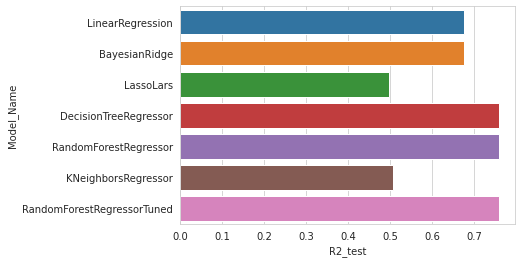

In [58]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df1['Model_Name'], x = comparison_df1['R2_test'])

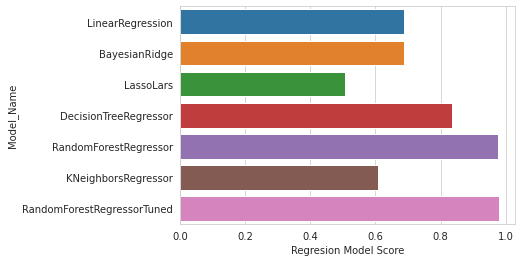

In [59]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df1['Model_Name'], x = comparison_df1['Regresion Model Score'])

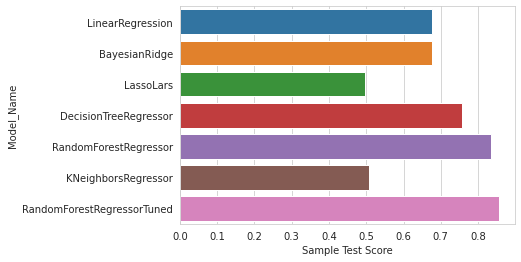

In [60]:
#visualising our comparison df for Test R2
sns.barplot(x=comparison_df1['Sample Test Score'], y = comparison_df1['Model_Name'])

####Random Forest vs Decision Tree

In [61]:
comparison_df1

,Model_Name,Regresion Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.686618,0.675482,0.239076,0.240988,1.980670,1.996156,0.686618,0.675482,0.686394,0.674940
1,BayesianRidge,0.686614,0.675505,0.239077,0.240980,1.980537,1.996011,0.686614,0.675505,0.686390,0.674963
2,LassoLars,0.506176,0.496392,0.300113,0.300209,2.619115,2.616874,0.506176,0.496392,0.505823,0.495551
3,DecisionTreeRegressor,0.833766,0.757854,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531
4,RandomForestRegressor,0.975061,0.835315,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531
5,KNeighborsRegressor,0.608701,0.506625,0.267149,0.297143,2.362434,2.612564,0.608701,0.506625,0.608421,0.505801
6,RandomForestRegressorTuned,0.979047,0.855884,0.174124,0.208169,1.407265,1.682745,0.833766,0.757854,0.833671,0.757531


In [64]:
comparison_df1.loc[:,["Model_Name","Sample Test Score","R2_test","Adj_r2_test"]]

,Model_Name,Sample Test Score,R2_test,Adj_r2_test
0,LinearRegression,0.675482,0.675482,0.674940
1,BayesianRidge,0.675505,0.675505,0.674963
2,LassoLars,0.496392,0.496392,0.495551
3,DecisionTreeRegressor,0.757854,0.757854,0.757531
4,RandomForestRegressor,0.835315,0.757854,0.757531
5,KNeighborsRegressor,0.506625,0.506625,0.505801
6,RandomForestRegressorTuned,0.855884,0.757854,0.757531


**Random Forest vs Baseline Model**

In [65]:
#Sample Test Score of the selected models
Decision_Tree_Sts = 0.757854
Random_Forest_Sts = 0.835315
Random_Forest_Tuned_Sts = 0.855884

In [66]:
#improvement % 
improvement_r = ((Random_Forest_Sts - Decision_Tree_Sts)/Decision_Tree_Sts)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 10.221 % was seen in Random Forest against Decision Tree.


### **Random Forest Tuned vs Baseline and Random Forest Models**

In [67]:
#improvement % of tuned vs simple random forest
improvement_r = ((Random_Forest_Tuned_Sts - Random_Forest_Sts)/Random_Forest_Sts)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 2.462 % was seen in Random Forest Tuned against Simple Random Forest.


### **Observation**

* Since the R^2 Score and the Adjusted_r^2_Score is similar in all the three cases and hence we haev to shift to the Sample Test Score.
* The Sample Test Score was seen in tuned Random Forest model with the value 0.855884 which was only 2.462 % improved from a simple random forest model. 
* It seems like we have maxed out on performance with the data and these models.

### **8. Store wise Sales Predictions**

In [241]:
#importing the pathway for the Rossmann Stores Data.csv
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Regression/results.csv')
df1

,Date,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
0,2013-01-01,85,2,0,1.0,1,b,a,1870.0,0,...,1,1,2013185,6613.290323,2013185,930.000000,15.0,0.000000,0,8.347590
1,2013-01-01,259,2,0,1.0,1,b,b,210.0,0,...,1,1,20131259,6079.354839,20131259,1420.387097,0.0,0.000000,0,8.832150
2,2013-01-01,259,2,0,1.0,1,b,b,210.0,0,...,1,1,20131259,6079.354839,20131259,511.774194,0.0,0.000000,0,8.832150
3,2013-01-01,259,2,0,1.0,1,b,b,210.0,0,...,1,1,20131259,5427.290323,20131259,1420.387097,0.0,0.000000,0,8.832150
4,2013-01-01,259,2,0,1.0,1,b,b,210.0,0,...,1,1,20131259,5427.290323,20131259,511.774194,0.0,0.000000,0,8.832150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786156,2015-07-31,1111,5,1,0.0,1,a,a,1900.0,1,...,31,212,201571111,3927.806452,201571111,325.258065,13.0,24.000000,1,8.652248
786157,2015-07-31,1112,5,1,0.0,1,c,c,1880.0,0,...,31,212,201571112,7312.000000,201571112,580.193548,111.0,0.000000,0,9.172223
786158,2015-07-31,1113,5,1,0.0,1,a,c,9260.0,0,...,31,212,201571113,5842.290323,201571113,584.580645,22.0,0.000000,0,8.894122
786159,2015-07-31,1114,5,1,0.0,1,a,c,870.0,0,...,31,212,201571114,20212.516129,201571114,3001.548387,22.0,0.000000,0,10.222232


In [242]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)


In [243]:
df1

DayOfWeek  Promo  StateHoliday  SchoolHoliday StoreType  \
Date       Store                                                            
2013-01-01 85             2      0           1.0              1         b   
           259            2      0           1.0              1         b   
           259            2      0           1.0              1         b   
           259            2      0           1.0              1         b   
           259            2      0           1.0              1         b   
...                     ...    ...           ...            ...       ...   
2015-07-31 1111           5      1           0.0              1         a   
           1112           5      1           0.0              1         c   
           1113           5      1           0.0              1         a   
           1114           5      1           0.0              1         a   
           1115           5      1           0.0              1         d   

                 Assortment  CompetitionDistance  Promo2  Year  Month  \
Date       Store                                                        
2013-01-01 85             a               1870.0       0  2013      1   
           259            b                210.0       0  2013      1   
           259            b                210.0       0  2013      1   
           259            b                210.0       0  2013      1   
           259            b                210.0       0  2013      1   
...                     ...                  ...     ...   ...    ...   
2015-07-31 1111           a               1900.0       1  2015      7   
           1112           c               1880.0       0  2015      7   
           1113           c               9260.0       0  2015      7   
           1114           c                870.0       0  2015      7   
           1115           c               5350.0       1  2015      7   

                  WeekOfYear  DayOfYear  sales_key      AvgSales   cust_key  \
Date       Store                                                              
2013-01-01 85              1          1    2013185   6613.290323    2013185   
           259             1          1   20131259   6079.354839   20131259   
           259             1          1   20131259   6079.354839   20131259   
           259             1          1   20131259   5427.290323   20131259   
           259             1          1   20131259   5427.290323   20131259   
...                      ...        ...        ...           ...        ...   
2015-07-31 1111           31        212  201571111   3927.806452  201571111   
           1112           31        212  201571112   7312.000000  201571112   
           1113           31        212  201571113   5842.290323  201571113   
           1114           31        212  201571114  20212.516129  201571114   
           1115           31        212  201571115   6115.709677  201571115   

                  AvgCustomer  CompetitionOpen  Promo2Open  Promo2running  \
Date       Store                                                            
2013-01-01 85      930.000000             15.0    0.000000              0   
           259    1420.387097              0.0    0.000000              0   
           259     511.774194              0.0    0.000000              0   
           259    1420.387097              0.0    0.000000              0   
           259     511.774194              0.0    0.000000              0   
...                       ...              ...         ...            ...   
2015-07-31 1111    325.258065             13.0   24.000000              1   
           1112    580.193548            111.0    0.000000              0   
           1113    584.580645             22.0    0.000000              0   
           1114   3001.548387             22.0    0.000000              0   
           1115    405.032258             22.0   38.071233              0   

                      Sales  
Date  

In [282]:
dfd = df1.sample(n=50000, random_state=1)

In [283]:
dfd

,,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,,,,
2013-10-26,706,6,0,0.0,0,d,a,7830.0,1,2013,10,43,299,201310706,4440.967742,201310706,424.612903,0.0,0.000000,0,8.599510
2014-11-01,54,6,0,0.0,0,d,c,7170.0,1,2014,11,44,305,20141154,7019.933333,20141154,576.258065,3.0,20.975343,1,9.270777
2013-12-06,786,5,1,0.0,0,a,a,290.0,1,2013,12,49,340,201312786,3301.032258,201312786,465.645161,85.0,10.126028,0,8.295798
2013-10-11,100,5,1,0.0,0,d,a,17930.0,0,2013,10,41,284,201310100,6049.516129,201310100,547.838710,1.0,0.000000,0,8.856803
2013-03-01,1115,5,0,0.0,0,d,c,5350.0,1,2013,3,9,60,201331115,5001.064516,201331115,345.258065,0.0,9.008219,1,8.532476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-22,976,2,0,0.0,1,a,a,4180.0,0,2014,4,17,112,20144976,5987.033333,20144976,608.533333,7.0,0.000000,0,8.876963
2015-03-17,468,2,1,0.0,0,c,c,5260.0,0,2015,3,12,76,20153468,4791.032258,20153468,536.161290,30.0,0.000000,0,8.433812
2013-08-03,2,6,0,0.0,0,a,a,570.0,1,2013,8,31,215,201382,4037.516129,201382,494.032258,69.0,40.142466,0,7.878913


In [284]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [285]:
y

Date        Store
2013-10-26  706      8.599510
2014-11-01  54       9.270777
2013-12-06  786      8.295798
2013-10-11  100      8.856803
2013-03-01  1115     8.532476
                       ...   
2014-04-22  976      8.876963
2015-03-17  468      8.433812
2013-08-03  2        7.878913
2015-05-21  429      8.629629
2014-10-08  1057     8.694167
Name: Sales, Length: 50000, dtype: float64

In [286]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [287]:
xd

,,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,...,CompetitionOpen,Promo2Open,Promo2running,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
Date,Store,,,,,,,,,,,,,,,,,,,,,
2013-10-26,706,6,0,0.0,0,7830.0,1,2013,10,43,299,...,0.0,0.000000,0,0,0,0,1,1,0,0
2014-11-01,54,6,0,0.0,0,7170.0,1,2014,11,44,305,...,3.0,20.975343,1,0,0,0,1,0,0,1
2013-12-06,786,5,1,0.0,0,290.0,1,2013,12,49,340,...,85.0,10.126028,0,1,0,0,0,1,0,0
2013-10-11,100,5,1,0.0,0,17930.0,0,2013,10,41,284,...,1.0,0.000000,0,0,0,0,1,1,0,0
2013-03-01,1115,5,0,0.0,0,5350.0,1,2013,3,9,60,...,0.0,9.008219,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-22,976,2,0,0.0,1,4180.0,0,2014,4,17,112,...,7.0,0.000000,0,1,0,0,0,1,0,0
2015-03-17,468,2,1,0.0,0,5260.0,0,2015,3,12,76,...,30.0,0.000000,0,0,0,1,0,0,0,1
2013-08-03,2,6,0,0.0,0,570.0,1,2013,8,31,215,...,69.0,40.142466,0,1,0,0,0,1,0,0


In [288]:
# split training and test datasets
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

In [289]:
yl_train

Date        Store
2015-03-25  827      9.410911
2013-10-09  814      9.042158
2014-10-02  916      8.724533
2013-12-09  17       8.756997
2014-06-06  102      9.044876
                       ...   
2015-04-21  1034     8.648923
2013-08-19  1073     8.501267
2015-07-21  294      8.770284
2014-07-02  1051     9.192075
2013-09-12  382      9.130106
Name: Sales, Length: 35000, dtype: float64

In [290]:
yl_test

Date        Store
2013-09-04  72       7.980024
2015-01-10  1035     7.494430
2013-11-23  521      8.607948
2014-09-26  209      8.513988
2015-02-28  203      8.870803
                       ...   
2013-01-15  265      8.223627
2014-05-17  123      8.122371
2013-07-29  796      9.313258
2014-03-29  833      8.519790
2014-11-14  1060     8.961494
Name: Sales, Length: 15000, dtype: float64

In [291]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=130, max_depth = 90, bootstrap=False, max_features='sqrt', min_samples_leaf=1, min_samples_split= 8)
rdfreg = rdf.fit(xl_train, yl_train)

In [292]:
#predictions 
y_pred_test = rdfreg.predict(xl_test)
df = yl_test.copy()
df['Pred_Sales'] = y_pred_test.tolist()

In [293]:
df = pd.DataFrame(six_weeks_sales_df)
df

,,Sales,Pred_Sales
Date,Store,,
2013-09-04,72,7.980024,8.106022
2015-01-10,1035,7.494430,7.750816
2013-11-23,521,8.607948,8.504376
2014-09-26,209,8.513988,8.592490
2015-02-28,203,8.870803,8.693568
...,...,...,...
2013-01-15,265,8.223627,8.238964
2014-05-17,123,8.122371,8.495919
2013-07-29,796,9.313258,9.233983


In [300]:
#locating
df.loc[('2015-07-28')]

,Sales,Pred_Sales
Store,,
294,9.037177,8.916720
599,9.233080,9.256752
743,8.419801,8.502476
59,8.809714,8.824045
100,9.113940,9.186265
590,8.635509,8.689295
555,8.642944,8.717482
933,9.154193,9.083670
1099,9.193194,9.363122


# **9. Conclusion and Recommendations**

## **Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

he work here forecasts the sales of the various Rossmann stores across Europe  and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations**
* More stores should be encouraged for promotion. 
* Store type B should be increased in number.
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.